In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Step 1

In [39]:
class NN(nn.Module): 
    def __init__(self, grad: bool):
        super().__init__()

        self.w00 = nn.Parameter(torch.rand(1)[0], requires_grad=grad)
        self.b00 = nn.Parameter(torch.rand(1)[0], requires_grad=False)

        self.w01 = nn.Parameter(torch.rand(1)[0], requires_grad=grad)
        self.b01 = nn.Parameter(torch.rand(1)[0], requires_grad=False)

        self.w02 = nn.Parameter(torch.rand(1)[0], requires_grad=grad)
        self.b02 = nn.Parameter(torch.rand(1)[0], requires_grad=False)

        self.w11 = nn.Parameter(torch.rand(1)[0], requires_grad=False)
        self.w12 = nn.Parameter(torch.rand(1)[0], requires_grad=False)
        self.w13 = nn.Parameter(torch.rand(1)[0], requires_grad=False)

        self.w20 = nn.Parameter(torch.rand(1)[0], requires_grad=grad)

    def forward(self, input):
        input_to_layer_01 = input * self.w00 + self.b00
        layer_01_output = F.relu(input_to_layer_01)
        layer_01_output = layer_01_output * self.w11

        input_to_layer_02 = input * self.w01 + self.b01
        layer_02_output = F.relu(input_to_layer_02)
        layer_02_output = layer_02_output * self.w12

        input_to_layer_03 = input * self.w02 + self.b02
        layer_03_output = F.relu(input_to_layer_03)
        layer_03_output = layer_03_output * self.w13

        output = layer_01_output + layer_02_output + layer_03_output

        output = F.tanh(output)
        output = output * self.w20
        return output

In [40]:
model = NN(grad=False)
X = torch.linspace(start=1, end=5, steps=100)
X

tensor([1.0000, 1.0404, 1.0808, 1.1212, 1.1616, 1.2020, 1.2424, 1.2828, 1.3232,
        1.3636, 1.4040, 1.4444, 1.4848, 1.5253, 1.5657, 1.6061, 1.6465, 1.6869,
        1.7273, 1.7677, 1.8081, 1.8485, 1.8889, 1.9293, 1.9697, 2.0101, 2.0505,
        2.0909, 2.1313, 2.1717, 2.2121, 2.2525, 2.2929, 2.3333, 2.3737, 2.4141,
        2.4545, 2.4949, 2.5354, 2.5758, 2.6162, 2.6566, 2.6970, 2.7374, 2.7778,
        2.8182, 2.8586, 2.8990, 2.9394, 2.9798, 3.0202, 3.0606, 3.1010, 3.1414,
        3.1818, 3.2222, 3.2626, 3.3030, 3.3434, 3.3838, 3.4242, 3.4646, 3.5051,
        3.5455, 3.5859, 3.6263, 3.6667, 3.7071, 3.7475, 3.7879, 3.8283, 3.8687,
        3.9091, 3.9495, 3.9899, 4.0303, 4.0707, 4.1111, 4.1515, 4.1919, 4.2323,
        4.2727, 4.3131, 4.3535, 4.3939, 4.4343, 4.4747, 4.5152, 4.5556, 4.5960,
        4.6364, 4.6768, 4.7172, 4.7576, 4.7980, 4.8384, 4.8788, 4.9192, 4.9596,
        5.0000])

In [41]:
y = model(X)
y

tensor([0.4195, 0.4216, 0.4236, 0.4254, 0.4271, 0.4287, 0.4302, 0.4315, 0.4328,
        0.4340, 0.4351, 0.4361, 0.4370, 0.4379, 0.4387, 0.4395, 0.4402, 0.4408,
        0.4414, 0.4420, 0.4425, 0.4430, 0.4434, 0.4438, 0.4442, 0.4445, 0.4449,
        0.4452, 0.4454, 0.4457, 0.4459, 0.4462, 0.4464, 0.4466, 0.4467, 0.4469,
        0.4470, 0.4472, 0.4473, 0.4474, 0.4475, 0.4476, 0.4477, 0.4478, 0.4479,
        0.4480, 0.4481, 0.4481, 0.4482, 0.4482, 0.4483, 0.4483, 0.4484, 0.4484,
        0.4485, 0.4485, 0.4485, 0.4486, 0.4486, 0.4486, 0.4486, 0.4487, 0.4487,
        0.4487, 0.4487, 0.4487, 0.4487, 0.4488, 0.4488, 0.4488, 0.4488, 0.4488,
        0.4488, 0.4488, 0.4488, 0.4488, 0.4488, 0.4488, 0.4489, 0.4489, 0.4489,
        0.4489, 0.4489, 0.4489, 0.4489, 0.4489, 0.4489, 0.4489, 0.4489, 0.4489,
        0.4489, 0.4489, 0.4489, 0.4489, 0.4489, 0.4489, 0.4489, 0.4489, 0.4489,
        0.4489])

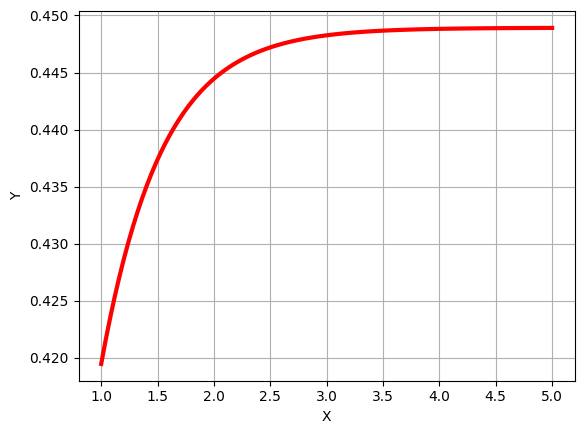

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x=X, y=y, color='red', linewidth=3)
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Step 2

In [43]:
trainable_model = NN(grad=True)
new_y = trainable_model(X)
new_y

tensor([0.1220, 0.1225, 0.1229, 0.1233, 0.1237, 0.1240, 0.1243, 0.1246, 0.1249,
        0.1252, 0.1255, 0.1257, 0.1259, 0.1262, 0.1264, 0.1265, 0.1267, 0.1269,
        0.1271, 0.1272, 0.1274, 0.1275, 0.1276, 0.1277, 0.1278, 0.1279, 0.1280,
        0.1281, 0.1282, 0.1283, 0.1284, 0.1285, 0.1285, 0.1286, 0.1287, 0.1287,
        0.1288, 0.1288, 0.1289, 0.1289, 0.1290, 0.1290, 0.1290, 0.1291, 0.1291,
        0.1291, 0.1292, 0.1292, 0.1292, 0.1292, 0.1293, 0.1293, 0.1293, 0.1293,
        0.1293, 0.1294, 0.1294, 0.1294, 0.1294, 0.1294, 0.1294, 0.1294, 0.1295,
        0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295,
        0.1295, 0.1295, 0.1295, 0.1296, 0.1296, 0.1296, 0.1296, 0.1296, 0.1296,
        0.1296, 0.1296, 0.1296, 0.1296, 0.1296, 0.1296, 0.1296, 0.1296, 0.1296,
        0.1296, 0.1296, 0.1296, 0.1296, 0.1296, 0.1296, 0.1296, 0.1296, 0.1296,
        0.1296], grad_fn=<MulBackward0>)

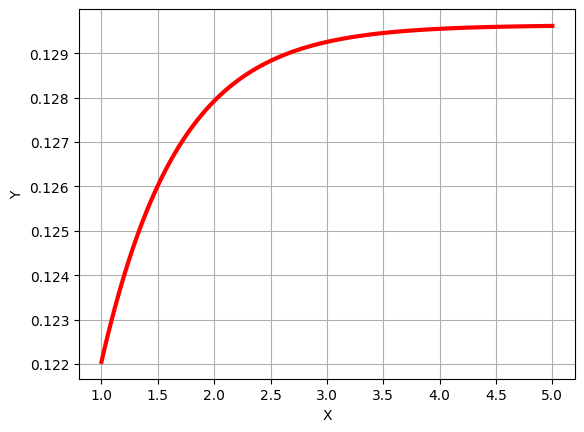

In [44]:
# create a new tensor that don't require a graph, hence the tensor can be converted to numpy array
sns.lineplot(x=X, y=new_y.detach(), color='red', linewidth=3)
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Step 3

In [45]:
from torch.optim import SGD
optimizer = SGD(trainable_model.parameters(), lr=0.01)
loss = nn.MSELoss()

In [52]:
for epoch in range(101):
    total_loss = 0

    for i in range(len(X)):
        input = X[i]
        
        actual_output = y[i]
        pred_output = trainable_model(input)

        loss_val = loss(actual_output, pred_output)
        loss_val.backward()

        total_loss += loss_val

    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Total Loss: {total_loss}')
        
    optimizer.step()
    optimizer.zero_grad()


Epoch: 0 | Total Loss: 0.00027581644826568663
Epoch: 10 | Total Loss: 0.00027180026518180966
Epoch: 20 | Total Loss: 0.0002678735472727567
Epoch: 30 | Total Loss: 0.0002640344901010394
Epoch: 40 | Total Loss: 0.00026027628337033093
Epoch: 50 | Total Loss: 0.0002565995091572404
Epoch: 60 | Total Loss: 0.00025300178094767034
Epoch: 70 | Total Loss: 0.0002494804502930492
Epoch: 80 | Total Loss: 0.00024603557540103793
Epoch: 90 | Total Loss: 0.0002426623977953568
Epoch: 100 | Total Loss: 0.0002393600734649226


In [53]:
pred_y = trainable_model(X)
pred_y

tensor([0.4198, 0.4214, 0.4229, 0.4243, 0.4257, 0.4270, 0.4282, 0.4294, 0.4305,
        0.4315, 0.4325, 0.4335, 0.4344, 0.4352, 0.4360, 0.4368, 0.4375, 0.4382,
        0.4389, 0.4395, 0.4401, 0.4407, 0.4412, 0.4417, 0.4422, 0.4426, 0.4431,
        0.4435, 0.4439, 0.4442, 0.4446, 0.4449, 0.4452, 0.4455, 0.4458, 0.4461,
        0.4463, 0.4465, 0.4468, 0.4470, 0.4472, 0.4474, 0.4476, 0.4477, 0.4479,
        0.4481, 0.4482, 0.4483, 0.4485, 0.4486, 0.4487, 0.4488, 0.4489, 0.4490,
        0.4491, 0.4492, 0.4493, 0.4494, 0.4495, 0.4495, 0.4496, 0.4497, 0.4497,
        0.4498, 0.4498, 0.4499, 0.4499, 0.4500, 0.4500, 0.4501, 0.4501, 0.4502,
        0.4502, 0.4502, 0.4503, 0.4503, 0.4503, 0.4503, 0.4504, 0.4504, 0.4504,
        0.4504, 0.4505, 0.4505, 0.4505, 0.4505, 0.4505, 0.4506, 0.4506, 0.4506,
        0.4506, 0.4506, 0.4506, 0.4506, 0.4506, 0.4507, 0.4507, 0.4507, 0.4507,
        0.4507], grad_fn=<MulBackward0>)

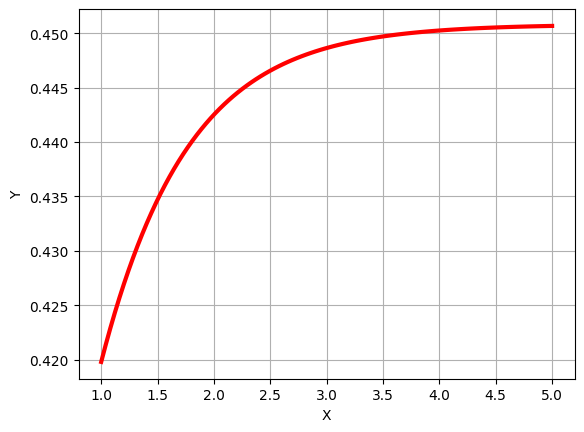

In [54]:
sns.lineplot(x=X, y=pred_y.detach(), color='red', linewidth=3)
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()